# Feedback
## Exercise 1
very good, but you do not use the metrics given in the parameter `metrics`. 1.5/2

## Exercise 2
1. very good 1/1
2. I am really not sure what is going on here with your tick labels, apparently not really working properly. 0.75/1
3. la interpretation es incorrecta (DT no siempre es mejor) y insuficiente (no hay discusión de confusiones particulares, por ejemplo en wine). 0.2/1

## Exercise 3
1. muy bien. 1/1
2. a ver, resultados suben de 0 o 0.25 a 0.34 y la conclusión de ustedes es que no ayuda porque "no suben los puntajes"? No entiendo esto. 0.5/1
3. esta precisamente no es la forma de hacerlo. 0.1/1

Total: 1.5 + 1 + 0.75 + 0.2 + 1 + 0.5 + 0.1 = 5.05/8

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
import sklearn.metrics
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import Normalizer

In [2]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

Data Ingestion

In [3]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]

In [4]:
labels_i= dfs.load_iris().target_names
labels_w= dfs.load_wine().target_names
labels_d= dfs.load_digits().target_names
labels_b= dfs.load_breast_cancer().target_names

#**Exercise 1**

1. Write a function compare_metrics(learners, X, y metrics, train_size, repeats), where learners is a list of classifier instances, metrics is a list of metrics, and X, y the data as usual.
The function should compute a pandas dataframe that contains one line for every learner and one column for every metric (besides the column for the learner description). The value in each cell should be the score of the row’s classifier for the column’s metric, averaged over repeats splits in which the train fold is of size train_size relative to the original data. It should return the data frame.

2. Look at the iris, wine, digits, and breast_cancer datasets, and compute binary versions of them (first class positive, rest negative). Then compute the accuracy, precision, recall, F1 (make sure applied to minority class), log-loss, brier-score, and AUROC for as many classifiers as you can spot in sklearn, but at least kNN LogisticRegression, and decision trees. Report the data frames. 


1.1

In [5]:
def plot_data(X, y):
    fig, ax = plt.subplots()
    for label in np.unique(y):
        mask = y == label
        ax.scatter(X[mask,0], X[mask,1], label = label)
    ax.legend()
    plt.show()

In [6]:
clasificadores= [KNeighborsClassifier(),
                 LogisticRegression(),
                 DecisionTreeClassifier(),
                 RandomForestClassifier()]


def compare_metrics(learners, X, y, train_size, repeats,  metrics = None):

  accuracy = []
  precision = []
  recall = []
  f1_score = []
  auroc = []
  log_loss = []
  brier = []
  clf = []
  df = pd.DataFrame()

  for clasificador in learners:
    for repeat in range(repeats):
      X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = train_size)
      dt = clasificador
      dt.fit(X_train, y_train)
      y_hat = dt.predict(X_test)
      y_prob = dt.predict_proba(X_test)
      
      acc =   sklearn.metrics.accuracy_score(y_test, y_hat)
      prec =  sklearn.metrics.precision_score(y_test, y_hat)
      rec =   sklearn.metrics.recall_score(y_test, y_hat)
      f1 =    sklearn.metrics.f1_score(y_test, y_hat)
      roc =   sklearn.metrics.roc_auc_score(y_test, y_prob[:,1])
      log =   sklearn.metrics.log_loss(y_test, y_prob)
      bri =   sklearn.metrics.brier_score_loss(y_test, y_prob[:,1])

      clf.append(str(clasificador))
      accuracy.append(acc)
      precision.append(prec)
      recall.append(rec)
      f1_score.append(f1)
      auroc.append(roc)
      log_loss.append(log)
      brier.append(bri)

  df['clasificadores'] = clf
  df['accuracy'] = accuracy
  df['precision'] = precision
  df['recall'] = recall
  df['f1_score'] = f1_score
  df['auroc'] = auroc
  df['log_loss'] = log
  df['brier_score'] = bri
  df = df.groupby("clasificadores").agg('mean').reset_index()
  df.clasificadores = df.clasificadores.str[:-2]
  #df = df.sort_values("accuracy", ascending= False)
  return df


Iris Dataset Analysis

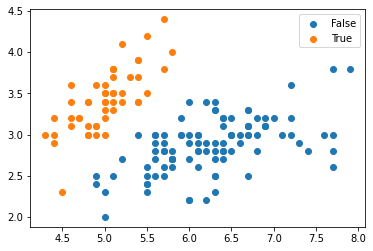

In [7]:
iris_bin_y = iris_y == 0 # make this a binary classification problem
plot_data(iris_X,iris_bin_y)

In [8]:
iris_metrics = compare_metrics(clasificadores, iris_X, iris_bin_y, train_size=0.7, repeats=5)
iris_metrics

,clasificadores,accuracy,precision,recall,f1_score,auroc,log_loss,brier_score
0,DecisionTreeClassifier,1.0,1.0,1.0,1.0,1.0,0.002991,0.000193
1,KNeighborsClassifier,1.0,1.0,1.0,1.0,1.0,0.002991,0.000193
2,LogisticRegression,1.0,1.0,1.0,1.0,1.0,0.002991,0.000193
3,RandomForestClassifier,1.0,1.0,1.0,1.0,1.0,0.002991,0.000193


Wine Dataset Analysis

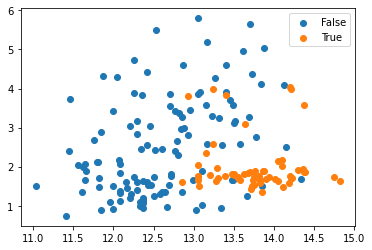

In [9]:
wine_bin_y = wine_y == 0 # make this a binary classification problem
plot_data(wine_X,wine_bin_y)

In [10]:
wine_metrics = compare_metrics(clasificadores, wine_X, wine_bin_y, train_size=0.7, repeats=5)
wine_metrics

,clasificadores,accuracy,precision,recall,f1_score,auroc,log_loss,brier_score
0,DecisionTreeClassifier,0.896296,0.801337,0.948765,0.867647,0.908080,0.093119,0.020213
1,KNeighborsClassifier,0.914815,0.886619,0.874608,0.875791,0.966727,0.093119,0.020213
2,LogisticRegression,0.940741,0.917778,0.900823,0.906763,0.982046,0.093119,0.020213
3,RandomForestClassifier,0.977778,0.990909,0.944955,0.966807,0.999711,0.093119,0.020213


Digits Dataset Analysis

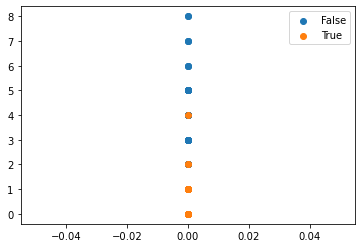

In [11]:
digits_bin_y = digits_y== 9 # make this a binary classification problem, separating the 9 from all the others
plot_data(digits_X,digits_bin_y)

In [12]:
digits_metrics = compare_metrics(clasificadores, digits_X, digits_bin_y, train_size=0.7, repeats=5)
digits_metrics

,clasificadores,accuracy,precision,recall,f1_score,auroc,log_loss,brier_score
0,DecisionTreeClassifier,0.953333,0.759944,0.761816,0.759823,0.867980,0.159593,0.025606
1,KNeighborsClassifier,0.992963,0.988379,0.942335,0.964655,0.996343,0.159593,0.025606
2,LogisticRegression,0.974074,0.843701,0.889241,0.861540,0.992121,0.159593,0.025606
3,RandomForestClassifier,0.972593,1.000000,0.729437,0.842814,0.991918,0.159593,0.025606


Breast Cancer Dataset Analysis

In [13]:
breast_metrics = compare_metrics(clasificadores, breast_X, breast_y, train_size=0.8, repeats=5)
breast_metrics

,clasificadores,accuracy,precision,recall,f1_score,auroc,log_loss,brier_score
0,DecisionTreeClassifier,0.943860,0.961789,0.951758,0.956584,0.940316,0.094384,0.025556
1,KNeighborsClassifier,0.924561,0.935045,0.952216,0.943077,0.948920,0.094384,0.025556
2,LogisticRegression,0.947368,0.925328,0.990750,0.956747,0.993895,0.094384,0.025556
3,RandomForestClassifier,0.945614,0.953725,0.960962,0.956908,0.985057,0.094384,0.025556


# **Exercise 2** 
1. Write a function mccv_confusion_matrix(learner, X, y, repeats = 10, train_size). The function should create repeats stratified splits of X, y. In each repeat, the train portion of X and y should be train_size of the original data. The rest should be used for validation. This creates a confusion matrix for each repetition. Form the average confusion matrix and return it and the list encoding the order of labels used by it.
2. Write a function plot_mccv_confusion_matrix(learner, X, y repeats = 10, train_size) that computes the MCCV confusion matrix and then plots it into a heat map. Use a single colored color map, like Blues. Make sure that the ticks of the plot are properly labeled with the respective class labels. 
3. Show the confusion matrices of kNN and a decision tree for the four classification datasets considered above and give a (short but concise) interpretation of misclassification behavior. Is there any pair of classes that can be separated better by one of the algorithms than by the other?

2.1

In [14]:
def mccv_confusion_matrix(learner, X, y, repeats, train_size):
    labels=np.unique(y)
    cm_acum = np.zeros((len(labels),len(labels)))
    for i in range(0,repeats):
        X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=train_size)
        model = learner().fit(X_train, y_train)
        predictions_dev = model.predict(X_train)
        cm=confusion_matrix(y_train,predictions_dev,labels=labels)
        cm_acum=cm_acum+cm
        #print(cm_acum)
    cm_acum=cm_acum/(repeats)
    print(f"Mean Iterated Confusion matrix:\n{cm_acum}")
    return cm_acum
cm_acum=mccv_confusion_matrix(LogisticRegression, iris_X, iris_y, 10, 0.75)

Mean Iterated Confusion matrix:
[[38.7  0.   0. ]
 [ 0.  33.7  1.9]
 [ 0.   0.2 37.5]]


In [68]:
from matplotlib.pyplot import figure
def plot_mccv_confusion_matrix(learner, X, y, repeats, train_size,labels):
    cm_acum=mccv_confusion_matrix(learner, X, y, repeats, train_size)
    fig, ax = plt.subplots(figsize=(8, 8))
    #figure(figsize=(30, 30), dpi=80)
    #sns.heatmap(cm_acum/np.sum(cm_acum), annot=True, fmt='.2%', cmap='Blues')
    sns.heatmap(cm_acum, annot=True#
                , fmt='g'
                , cmap='Blues')
    #labels=np.unique(y)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

Mean Iterated Confusion matrix:
[[37.9  0.   0. ]
 [ 0.  36.1  1.6]
 [ 0.   1.  35.4]]
Mean Iterated Confusion matrix:
[[37.1  0.   0. ]
 [ 0.  36.2  0. ]
 [ 0.   0.  38.7]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

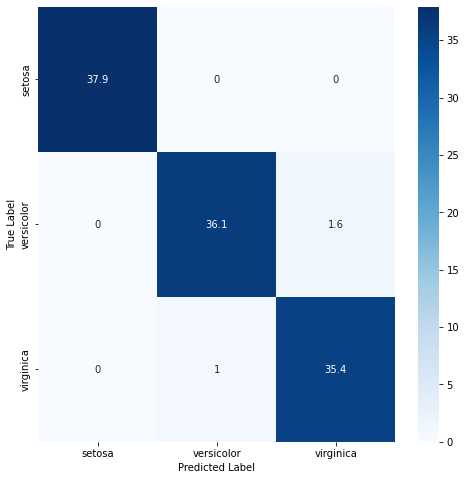

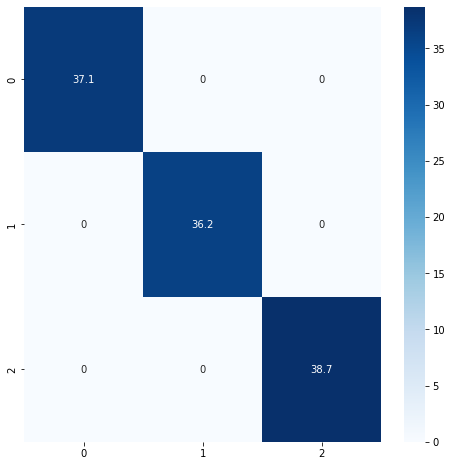

In [69]:
plot_mccv_confusion_matrix(KNeighborsClassifier, iris_X, iris_y, 10, 0.75,labels_i)
plot_mccv_confusion_matrix(DecisionTreeClassifier, iris_X, iris_y, 10, 0.75,labels_b)

Mean Iterated Confusion matrix:
[[40.5  0.8  2.1]
 [ 4.2 40.9  8.8]
 [ 2.8  9.7 23.2]]
Mean Iterated Confusion matrix:
[[44.8  0.   0. ]
 [ 0.  52.1  0. ]
 [ 0.   0.  36.1]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

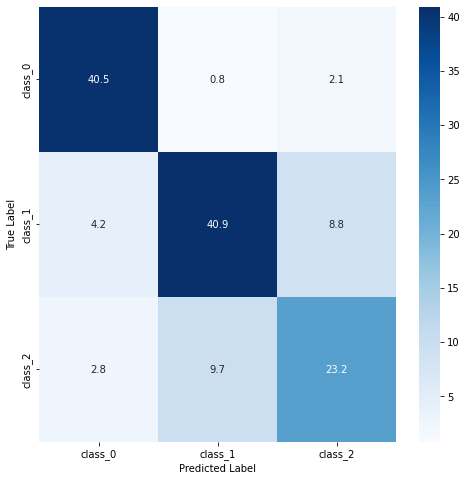

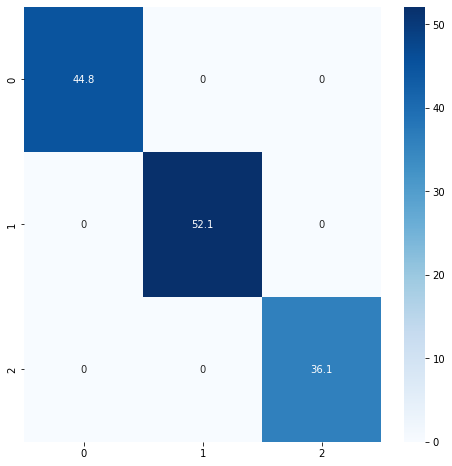

In [17]:
plot_mccv_confusion_matrix(KNeighborsClassifier, wine_X, wine_y, 10, 0.75,labels_w)
plot_mccv_confusion_matrix(DecisionTreeClassifier, wine_X, wine_y, 10, 0.75,labels_b)

Mean Iterated Confusion matrix:
[[1.340e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.352e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.312e+02 1.000e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.343e+02 0.000e+00 0.000e+00 0.000e+00
  1.400e+00 0.000e+00 2.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.357e+02 0.000e+00 0.000e+00
  2.000e-01 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.379e+02 7.000e-01
  0.000e+00 0.000e+00 8.000e-01]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.371e+02
  0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.329e+02 0.000e+00 2.000e-01]
 [0.000e+00 2.900e+00 1.000e-01 6.000e-01 0.000e+00 0.000e+00 4.000e-01
  0.000e+00 1.260e+02 0.000e+00]
 [0.000e+00 7.000e-01 0

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (2).

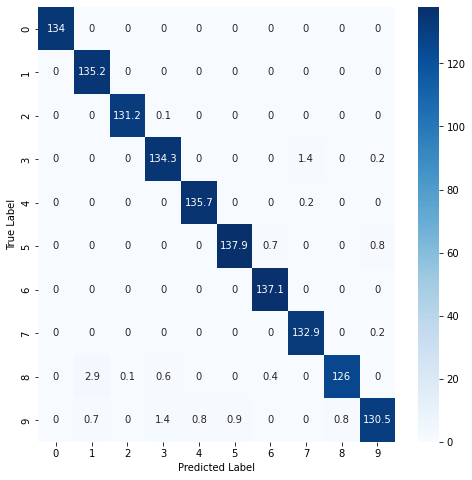

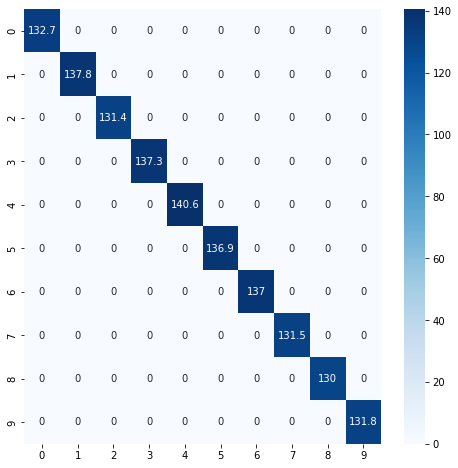

In [18]:
plot_mccv_confusion_matrix(KNeighborsClassifier, digits_X, digits_y,10, 0.75,labels_d)
plot_mccv_confusion_matrix(DecisionTreeClassifier, digits_X, digits_y, 10, 0.75,labels_b)

In [ ]:
plot_mccv_confusion_matrix(KNeighborsClassifier, breast_X, breast_y, 10, 0.75,labels_b)
plot_mccv_confusion_matrix(DecisionTreeClassifier, breast_X, breast_y, 10, 0.75,labels_b)

En efecto, al comparar ambos modelos se observa en la matriz de confusión que el desición tree logra mejores resultados para separar las clases de todos los datasets, logrando pronosticar de mejor manera el target y por ende con menores errores. Una vez más, el resultado del DT está llamado a revisión por sobreajuste a la base.

2.2

#**Exercise 3**

1. Write a function mccv_with_smote(learner, X, y, repeats train_size, score) that works as a standard MCCV only that it applies SMOTE (you can use any external library for this) to each train fold prior to training the actual learner. Here, score should be the metric for evaluation like f1. Look at the documentation of sklearn.metrics for the names of the metric.
2. Apply your function to properly asses the performance of a decision tree and kNN on the imbalance dataset (attached to the exercise). Is SMOTE of any use for any of the two algorithms?
3. For each of the four classification datasets, check the effect of MinMaxScaler, Standard- Scaler, PowerTransform, and Normalization on the different performance metrics of kNN (you might want to re-use your solution to Exercise 1). Use a k-fold cross validation or MCCV for this assessment. Give a brief summary of your findings: Is scaling useful or harmful for kNN?

3.1 Write a function mccv_with_smote(learner, X, y, repeats train_size, score) that works as a standard MCCV only that it applies SMOTE (you can use any external library for this) to each train fold prior to training the actual learner. Here, score should be the metric for evaluation like f1. Look at the documentation of sklearn.metrics for the names of the metric.

<AxesSubplot:xlabel='class', ylabel='count'>

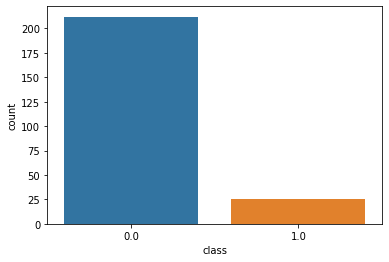

In [22]:
data= pd.read_csv("../imbalanced.csv") 
x=data.drop("class",1)
y=data["class"]
sns.countplot(x=y)

In [23]:
def mccv_with_smote(learner, X, y, repeats = 30, train_size = 0.7, metric = sklearn.metrics.f1_score):
    scores = []
    for i in range(repeats):
        X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, train_size = train_size)
        smote = SMOTE()
        X_res, y_res = smote.fit_resample(X_train, y_train)
        learner.fit(X_res, y_res)
        y_hat = learner.predict(X_valid)
        scores.append(metric(y_hat, y_valid))
    return np.mean(scores)

3.2 Apply your function to properly asses the performance of a decision tree and kNN on the imbalance dataset (attached to the exercise). Is SMOTE of any use for any of the two algorithms?

A continuación entrenamos 2 modelos sin SMOTE para luego compararlos con el modelo con SMOTE.

In [24]:
arbol=sklearn.tree.DecisionTreeClassifier()
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x, y, train_size = 0.7)
arbol.fit(X_train,y_train)
y_hat = arbol.predict(X_valid)
print(sklearn.metrics.f1_score(y_hat, y_valid))

0.23529411764705882


In [25]:
vecinos=sklearn.neighbors.KNeighborsClassifier()
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(x, y, train_size = 0.7)
vecinos.fit(X_train,y_train)
y_hat = vecinos.predict(X_valid)
print(sklearn.metrics.f1_score(y_hat, y_valid))

0.0


In [26]:
mccv_with_smote(sklearn.tree.DecisionTreeClassifier(),x,y,100,0.7,sklearn.metrics.f1_score)

0.3169482293276816

In [27]:
mccv_with_smote(sklearn.neighbors.KNeighborsClassifier(),x,y,100,0.7,sklearn.metrics.f1_score)

0.3415167617338959

Conclusión: No es adecuado utilizar la técnica upsampling con SMOTE dado que no sube lo suficiente los puntajes.

3.3 For each of the four classification datasets, check the effect of MinMaxScaler, Standard- Scaler, PowerTransform, and Normalization on the different performance metrics of kNN (you might want to re-use your solution to Exercise 1). Use a k-fold cross validation or MCCV for this assessment. Give a brief summary of your findings: Is scaling useful or harmful for kNN?

In [28]:
transform = MinMaxScaler()   
iris_X_m = transform.fit_transform(iris_X)

transform = StandardScaler()   
iris_X_s = transform.fit_transform(iris_X)

iris_X_p = power_transform(iris_X)

transform = Normalizer()   
iris_X_n = transform.fit_transform(iris_X)

In [29]:
clasificadores=[KNeighborsClassifier()]

iris_metrics = compare_metrics(clasificadores, iris_X_m, iris_bin_y, train_size=0.7, repeats=5)
print(iris_metrics)
iris_metrics = compare_metrics(clasificadores, iris_X_s, iris_bin_y, train_size=0.7, repeats=5)
print(iris_metrics)
iris_metrics = compare_metrics(clasificadores, iris_X_p, iris_bin_y, train_size=0.7, repeats=5)
print(iris_metrics)
iris_metrics = compare_metrics(clasificadores, iris_X_n, iris_bin_y, train_size=0.7, repeats=5)
print(iris_metrics)

         clasificadores  accuracy  precision  recall  f1_score  auroc  \
0  KNeighborsClassifier       1.0        1.0     1.0       1.0    1.0   

       log_loss  brier_score  
0  9.992007e-16          0.0  
         clasificadores  accuracy  precision  recall  f1_score  auroc  \
0  KNeighborsClassifier       1.0        1.0     1.0       1.0    1.0   

   log_loss  brier_score  
0  0.011352     0.003556  
         clasificadores  accuracy  precision  recall  f1_score  auroc  \
0  KNeighborsClassifier       1.0        1.0     1.0       1.0    1.0   

   log_loss  brier_score  
0  0.011352     0.003556  
         clasificadores  accuracy  precision  recall  f1_score  auroc  \
0  KNeighborsClassifier       1.0        1.0     1.0       1.0    1.0   

       log_loss  brier_score  
0  9.992007e-16          0.0  


In [30]:
transform = MinMaxScaler()   
breast_X_m = transform.fit_transform(breast_X)

transform = StandardScaler()   
breast_X_s = transform.fit_transform(breast_X)

breast_X_p = power_transform(breast_X)

transform = Normalizer()   
breast_X_n = transform.fit_transform(breast_X)

In [31]:
clasificadores=[KNeighborsClassifier()]

breast_metrics = compare_metrics(clasificadores, breast_X_m, breast_y, train_size=0.7, repeats=5)
print( breast_metrics)
breast_metrics = compare_metrics(clasificadores, breast_X_s, breast_y, train_size=0.7, repeats=5)
print(breast_metrics)
breast_metrics = compare_metrics(clasificadores, breast_X_p, breast_y, train_size=0.7, repeats=5)
print(breast_metrics)
breast_metrics = compare_metrics(clasificadores, breast_X_n, breast_y, train_size=0.7, repeats=5)
print(breast_metrics)

         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.968421    0.96194  0.988655   0.97497  0.990304   

   log_loss  brier_score  
0  0.272596     0.029942  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.967251   0.956255  0.992606   0.97391  0.986138   

   log_loss  brier_score  
0  0.473233     0.032515  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.960234   0.962234  0.972754   0.96742  0.989181   

   log_loss  brier_score  
0  0.277365     0.029942  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.927485   0.923153  0.964663  0.943307  0.958718   

   log_loss  brier_score  
0  0.701484     0.047018  


In [32]:
transform = MinMaxScaler()   
digits_X_m = transform.fit_transform(digits_X)

transform = StandardScaler()   
digits_X_s = transform.fit_transform(digits_X)

digits_X_p = power_transform(digits_X)

transform = Normalizer()   
digits_X_n = transform.fit_transform(digits_X)

In [33]:
clasificadores=[KNeighborsClassifier()]

digits_metrics = compare_metrics(clasificadores, digits_X_m, digits_bin_y, train_size=0.7, repeats=5)
print(digits_metrics)
digits_metrics = compare_metrics(clasificadores, digits_X_s, digits_bin_y, train_size=0.7, repeats=5)
print(digits_metrics)
digits_metrics = compare_metrics(clasificadores, digits_X_p, digits_bin_y, train_size=0.7, repeats=5)
print(digits_metrics)
digits_metrics = compare_metrics(clasificadores, digits_X_n, digits_bin_y, train_size=0.7, repeats=5)
print(digits_metrics)

         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.995556    0.98068  0.973415  0.977013  0.995601   

   log_loss  brier_score  
0  0.073423     0.004815  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier   0.98963   0.955614  0.944011  0.949596  0.984805   

   log_loss  brier_score  
0  0.150247     0.010148  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.981852   0.947806  0.870978  0.907053  0.982651   

   log_loss  brier_score  
0  0.028711     0.008296  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.992593   0.978162  0.950332  0.963953  0.993851   

   log_loss  brier_score  
0  0.077718        0.006  


In [34]:
transform = MinMaxScaler()   
wine_X_m = transform.fit_transform(wine_X)

transform = StandardScaler()   
wine_X_s = transform.fit_transform(wine_X)

wine_X_p = power_transform(wine_X)

transform = Normalizer()   
wine_X_n = transform.fit_transform(wine_X)

In [35]:
clasificadores=[KNeighborsClassifier()]

wine_metrics = compare_metrics(clasificadores, wine_X_m, wine_bin_y, train_size=0.7, repeats=5)
print(wine_metrics)
wine_metrics = compare_metrics(clasificadores, wine_X_s, wine_bin_y, train_size=0.7, repeats=5)
print(wine_metrics)
wine_metrics = compare_metrics(clasificadores, wine_X_p, wine_bin_y, train_size=0.7, repeats=5)
print(wine_metrics)
wine_metrics = compare_metrics(clasificadores, wine_X_n, wine_bin_y, train_size=0.7, repeats=5)
print(wine_metrics)

         clasificadores  accuracy  precision    recall  f1_score    auroc  \
0  KNeighborsClassifier  0.977778   0.941282  0.988889  0.963996  0.99643   

   log_loss  brier_score  
0  0.068629     0.023704  
         clasificadores  accuracy  precision  recall  f1_score     auroc  \
0  KNeighborsClassifier  0.985185   0.955095     1.0  0.976884  0.999432   

   log_loss  brier_score  
0  0.048285     0.014815  
         clasificadores  accuracy  precision  recall  f1_score     auroc  \
0  KNeighborsClassifier   0.97037   0.907941     1.0  0.949904  0.994304   

   log_loss  brier_score  
0  0.686696     0.031852  
         clasificadores  accuracy  precision    recall  f1_score     auroc  \
0  KNeighborsClassifier  0.955556       0.98  0.894891  0.932705  0.979903   

   log_loss  brier_score  
0  0.737371      0.04963  


Cross_Validate para scale (MinMaxScaler, Standard-Scaler, PowerTransform y Normalization en las diferentes métricas de rendimiento de kNN)

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
def cross_validation(model, _X, _y, _cv=5):

      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring)
      
      return  {"Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
cross_validation(KNeighborsClassifier(), iris_X_m, iris_bin_y, _cv=5)

{'Validation Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Accuracy': 100.0,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation F1 Score': 1.0}

In [38]:
cross_validation(KNeighborsClassifier(), iris_X_s, iris_bin_y, _cv=5)


{'Validation Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Accuracy': 100.0,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation F1 Score': 1.0}

In [39]:
cross_validation(KNeighborsClassifier(), iris_X_p, iris_bin_y, _cv=5)

{'Validation Accuracy scores': array([1.        , 1.        , 1.        , 1.        , 0.96666667]),
 'Mean Validation Accuracy': 99.33333333333334,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([1. , 1. , 1. , 1. , 0.9]),
 'Mean Validation Recall': 0.9800000000000001,
 'Validation F1 scores': array([1.        , 1.        , 1.        , 1.        , 0.94736842]),
 'Mean Validation F1 Score': 0.9894736842105264}

In [40]:
cross_validation(KNeighborsClassifier(), iris_X_n, iris_bin_y, _cv=5)

{'Validation Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Accuracy': 100.0,
 'Validation Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Precision': 1.0,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation F1 Score': 1.0}

In [41]:
cross_validation(KNeighborsClassifier(), breast_X_m, breast_y, _cv=5)

{'Validation Accuracy scores': array([0.95614035, 0.95614035, 0.99122807, 0.95614035, 0.97345133]),
 'Mean Validation Accuracy': 96.66200900481292,
 'Validation Precision scores': array([0.97142857, 0.94594595, 0.98630137, 0.93506494, 0.98571429]),
 'Mean Validation Precision': 0.9648910216033503,
 'Validation Recall scores': array([0.95774648, 0.98591549, 1.        , 1.        , 0.97183099]),
 'Mean Validation Recall': 0.9830985915492958,
 'Validation F1 scores': array([0.96453901, 0.96551724, 0.99310345, 0.96644295, 0.9787234 ]),
 'Mean Validation F1 Score': 0.9736652108045648}

In [42]:
cross_validation(KNeighborsClassifier(), breast_X_s, breast_y, _cv=5)

{'Validation Accuracy scores': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177]),
 'Mean Validation Accuracy': 96.48501785437045,
 'Validation Precision scores': array([0.97183099, 0.94594595, 0.97297297, 0.93506494, 0.98550725]),
 'Mean Validation Precision': 0.9622644172552318,
 'Validation Recall scores': array([0.97183099, 0.98591549, 1.        , 1.        , 0.95774648]),
 'Mean Validation Recall': 0.9830985915492958,
 'Validation F1 scores': array([0.97183099, 0.96551724, 0.98630137, 0.96644295, 0.97142857]),
 'Mean Validation F1 Score': 0.9723042243213046}

In [43]:
cross_validation(KNeighborsClassifier(), breast_X_p, breast_y, _cv=5)

{'Validation Accuracy scores': array([0.97368421, 0.96491228, 0.99122807, 0.95614035, 0.92920354]),
 'Mean Validation Accuracy': 96.30336904207422,
 'Validation Precision scores': array([0.97222222, 0.95890411, 0.98630137, 0.93506494, 0.95652174]),
 'Mean Validation Precision': 0.9618028751739294,
 'Validation Recall scores': array([0.98591549, 0.98591549, 1.        , 1.        , 0.92957746]),
 'Mean Validation Recall': 0.980281690140845,
 'Validation F1 scores': array([0.97902098, 0.97222222, 0.99310345, 0.96644295, 0.94285714]),
 'Mean Validation F1 Score': 0.9707293490792679}

In [44]:
cross_validation(KNeighborsClassifier(), breast_X_n, breast_y, _cv=5)

{'Validation Accuracy scores': array([0.92982456, 0.92105263, 0.92105263, 0.92982456, 0.91150442]),
 'Mean Validation Accuracy': 92.26517621487346,
 'Validation Precision scores': array([0.90909091, 0.94285714, 0.92      , 0.92105263, 0.91780822]),
 'Mean Validation Precision': 0.9221617805410162,
 'Validation Recall scores': array([0.98591549, 0.92957746, 0.95833333, 0.97222222, 0.94366197]),
 'Mean Validation Recall': 0.957942097026604,
 'Validation F1 scores': array([0.94594595, 0.93617021, 0.93877551, 0.94594595, 0.93055556]),
 'Mean Validation F1 Score': 0.9394786340834973}

In [45]:
cross_validation(KNeighborsClassifier(), digits_X_m, digits_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.98888889, 0.97777778, 0.98607242, 1.        , 0.99164345]),
 'Mean Validation Accuracy': 98.88765088207985,
 'Validation Precision scores': array([0.97058824, 0.86842105, 0.91891892, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9515856413689232,
 'Validation Recall scores': array([0.91666667, 0.91666667, 0.94444444, 1.        , 0.91666667]),
 'Mean Validation Recall': 0.9388888888888889,
 'Validation F1 scores': array([0.94285714, 0.89189189, 0.93150685, 1.        , 0.95652174]),
 'Mean Validation F1 Score': 0.9445555246389075}

In [46]:
cross_validation(KNeighborsClassifier(), digits_X_s, digits_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.98611111, 0.98055556, 0.99164345, 0.99442897, 0.98607242]),
 'Mean Validation Accuracy': 98.77623026926649,
 'Validation Precision scores': array([0.96969697, 0.89189189, 0.94594595, 0.97222222, 0.96969697]),
 'Mean Validation Precision': 0.9498907998907999,
 'Validation Recall scores': array([0.88888889, 0.91666667, 0.97222222, 0.97222222, 0.88888889]),
 'Mean Validation Recall': 0.9277777777777778,
 'Validation F1 scores': array([0.92753623, 0.90410959, 0.95890411, 0.97222222, 0.92753623]),
 'Mean Validation F1 Score': 0.938061676924095}

In [47]:
cross_validation(KNeighborsClassifier(), digits_X_p, digits_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.96944444, 0.96944444, 0.97493036, 0.98607242, 0.97493036]),
 'Mean Validation Accuracy': 97.49644073042403,
 'Validation Precision scores': array([0.87878788, 0.90322581, 0.90909091, 0.94285714, 0.90909091]),
 'Mean Validation Precision': 0.9086105292556905,
 'Validation Recall scores': array([0.80555556, 0.77777778, 0.83333333, 0.91666667, 0.83333333]),
 'Mean Validation Recall': 0.8333333333333334,
 'Validation F1 scores': array([0.84057971, 0.8358209 , 0.86956522, 0.92957746, 0.86956522]),
 'Mean Validation F1 Score': 0.8690217010477314}

In [48]:
cross_validation(KNeighborsClassifier(), digits_X_n, digits_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.98888889, 0.98055556, 0.98885794, 0.99442897, 0.99164345]),
 'Mean Validation Accuracy': 98.88749613122873,
 'Validation Precision scores': array([0.97058824, 0.91428571, 0.92105263, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9611853162317558,
 'Validation Recall scores': array([0.91666667, 0.88888889, 0.97222222, 0.94444444, 0.91666667]),
 'Mean Validation Recall': 0.9277777777777778,
 'Validation F1 scores': array([0.94285714, 0.90140845, 0.94594595, 0.97142857, 0.95652174]),
 'Mean Validation F1 Score': 0.9436323700132639}

In [49]:
cross_validation(KNeighborsClassifier(), wine_X_m, wine_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.88888889, 0.97222222, 0.97222222, 1.        , 1.        ]),
 'Mean Validation Accuracy': 96.66666666666669,
 'Validation Precision scores': array([0.75      , 0.92307692, 0.92307692, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9192307692307693,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([0.85714286, 0.96      , 0.96      , 1.        , 1.        ]),
 'Mean Validation F1 Score': 0.9554285714285715}

In [50]:
cross_validation(KNeighborsClassifier(), wine_X_s, wine_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.88888889, 0.97222222, 0.97222222, 1.        , 1.        ]),
 'Mean Validation Accuracy': 96.66666666666669,
 'Validation Precision scores': array([0.75      , 0.92307692, 0.92307692, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9192307692307693,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([0.85714286, 0.96      , 0.96      , 1.        , 1.        ]),
 'Mean Validation F1 Score': 0.9554285714285715}

In [51]:
cross_validation(KNeighborsClassifier(), wine_X_m, wine_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.88888889, 0.97222222, 0.97222222, 1.        , 1.        ]),
 'Mean Validation Accuracy': 96.66666666666669,
 'Validation Precision scores': array([0.75      , 0.92307692, 0.92307692, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9192307692307693,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([0.85714286, 0.96      , 0.96      , 1.        , 1.        ]),
 'Mean Validation F1 Score': 0.9554285714285715}

In [52]:
cross_validation(KNeighborsClassifier(), wine_X_m, wine_bin_y, _cv=5)

{'Validation Accuracy scores': array([0.88888889, 0.97222222, 0.97222222, 1.        , 1.        ]),
 'Mean Validation Accuracy': 96.66666666666669,
 'Validation Precision scores': array([0.75      , 0.92307692, 0.92307692, 1.        , 1.        ]),
 'Mean Validation Precision': 0.9192307692307693,
 'Validation Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Validation Recall': 1.0,
 'Validation F1 scores': array([0.85714286, 0.96      , 0.96      , 1.        , 1.        ]),
 'Mean Validation F1 Score': 0.9554285714285715}

Conclusión = De acuerdo con los resultados obtenidos del proceso de scale MinMaxScaler, Standard-Scaler, PowerTransform y Normalization en las diferentes métricas de rendimiento de kNN, se evidencia que de acuerdo con el Dataset resulta benéfico o perjudicial.

**Iris**: Al convertirlo en un problema de clasificación binaria, desde antes del escalado se observaban métricas muy buenas, cercanas a 1. Por ende, las distintas técnicas de escalado no resultaron benéficas, sino por el contrario Standard Scaler y Power Transform empeoraron el f1_score, recall y accuracy. 

**Wine**: En este caso mejoró el resultado obtenido luego de las transformaciones de escalado para algunas métricas, por ejemplo para la métrica de Accuracy, este pasó de 0.896 a 0.985 en el modelo de KNN, luego de aplicar un Power Transform.

**Digits**: Antes de aplicar escalado el resultado ya era muy bueno con métricas muy cercanas a 1 y en términos generales luego de las técnicas de escalado, el resultado empeoró el performance de KNN en todas sus métricas, por ejemplo luego de aplicar Standar Scaler, el recall pasó de 0.972 a 0.934.

**Breast**: Con el Dataset de Breast Cancer, se evidenció que en general una transformación de escalado mejora el rendimiento de KNN y esto se observa en todas sus métricas, por ejemplo, el accuracy pasó de 0.938 a 0.964 cuando se usó un MinMaxScaler y el recall pasó de 0.955 a 
0.985.